# Gradient Descent Update Rule

Given the mean squared error as our loss function: 

$$MSE = \frac{1}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$$

We can find the update rule for a single iteration of gradient descent by finding the partial derivative with respect to both $\beta_0$ and $\beta_1$

$$
\begin{align}
\frac{\partial MSE}{\partial \beta_0} & = \frac{1}{n} \sum_{i = 1}^n \frac{\partial}{\partial \beta_0} (y_i - (\beta_0 + \beta_1 x_i))^2\\
    & = - \frac{2}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i))
\end{align}
$$

$$
\newline
$$

$$
\begin{align}
\frac{\partial MSE}{\partial \beta_1} & = \frac{1}{n} \sum_{i = 1}^n \frac{\partial}{\partial \beta_1} (y_i - (\beta_0 + \beta_1 x_i))^2\\
    & = - \frac{2}{n} \sum_{i = 1}^n x_i (y_i - (\beta_0 + \beta_1 x_i))
\end{align}
$$

Then, our update rule for gradient descent is as follows:

$$\beta_0 \leftarrow \beta_0 - \lambda \bigg[ - \frac{2}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i)) \bigg]$$

$$\beta_1 \leftarrow \beta_1 - \lambda \bigg[ - \frac{2}{n} \sum_{i = 1}^n x_i (y_i - (\beta_0 + \beta_1 x_i)) \bigg]$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import t

In [3]:
def gradient_descent(X, y, lr=0.05, epochs=100):
    N = len(X)
    w0, w1 = np.random.rand(2, 1)

    for i in range(epochs):       
        f = y - (w0 + w1 * X)
        w0 -= lr * (-2 * f.sum() / N)
        w1 -= lr * (-2 * X.dot(f).sum() / N)

    return [w0, w1]

In [4]:
X = np.array([1, 2, 3, 5])
y = np.array([0, 2, 4, 5])

w = gradient_descent(X, y)
y_pred = w[0] + w[1] * X

Final weights:  [-0.4371001] [1.17339241]
Prediction:  [0.73629231 1.90968472 3.08307713 5.42986195]
MSE:  0.3939530150993129
R^2:  0.8931652840408643


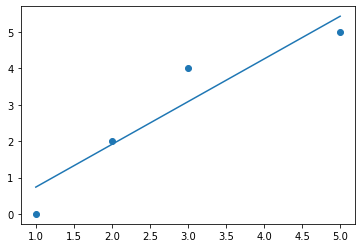

In [5]:
print('Final weights: ', w[0], w[1])
print('Prediction: ', y_pred)
print('MSE: ', mean_squared_error(y, y_pred))
print('R^2: ', r2_score(y, y_pred))

plt.plot(X, y_pred)
plt.scatter(X, y)

# Model Fit
We see that $R^2 = 0.893$, which means the variation in y can be explained relatively accurately by X.

From our model, $Y = \beta_0 + \beta_1 X$, we know that $\beta_0$ is our y-intercept and $\beta_1$ is the slope of the line. Another way to describe $\beta_1$ is to say that the target $y$ increases by about 1.187 when the predictor $x$ increases by 1.

---

# Bootstrapping/Bagging

In [6]:
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
from scipy import stats

In [7]:
# Generate 500 samples between 0 and 100
x = np.linspace(0, 100, 500)

# For each X value, at 2 and multiply by 2*epsilon, where epsilon is normally distributed and standardized
y = x + 2 * np.random.randn(len(x))

# How many different models we want to try
n_estimators = 500

# Number of samples to draw, with replacement, in training each estimator
max_samples = 500

# Used for storing the estimators beta0 and beta1
beta0 = []
beta1 = []

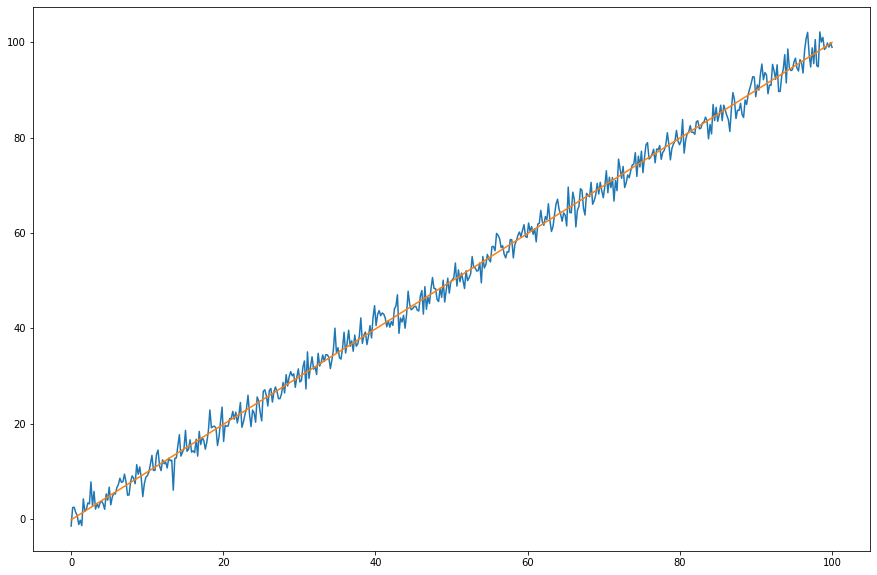

In [8]:
model0 = linear_model.LinearRegression()
model0.fit(np.array(x).reshape(-1, 1), np.array(y))
y_hat = model0.intercept_ + model0.coef_ * x
plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.plot(x, y_hat)

In [9]:
print('beta0, beta1: ',model0.intercept_, model0.coef_[0])

beta0, beta1:  -0.15791834080462763 1.0012424999493508


In [10]:
model = BaggingRegressor(linear_model.LinearRegression(),
                        n_estimators=n_estimators,
                        max_samples=max_samples,
                        bootstrap=True)

model.fit(x.reshape(500,1), y)

for m in model.estimators_:
    beta0.append(m.intercept_)
    beta1.append(m.coef_[0])

In [11]:
print('mean beta0: {}, beta0 stddev: {}\nmean beta1: {}, beta stddev: {}'.format(
    np.mean(beta0),
    np.std(beta0),
    np.mean(beta1),
    np.std(beta1))
 )

mean beta0: -0.15725697362577498, beta0 stddev: 0.17403386334016055
mean beta1: 1.0012629309770293, beta stddev: 0.0032134604694407025


MSE =  3.852997031966495
R^2 =  0.9954272892288061


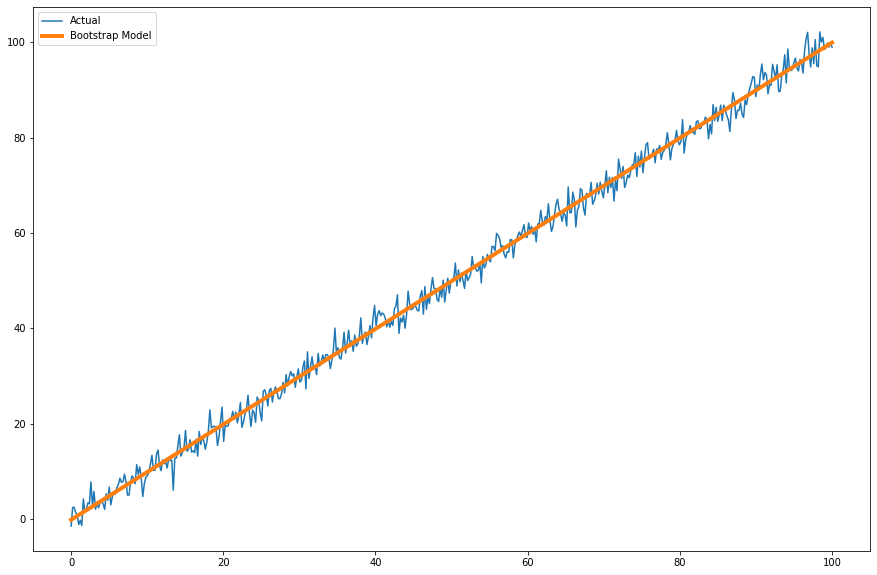

In [12]:
y_pred = np.mean(beta0) + np.mean(beta1) * x

plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.plot(x, y_pred, linewidth=4)
plt.legend(['Actual', 'Bootstrap Model'])

print('MSE = ', mean_squared_error(y, y_pred))
print('R^2 = ', r2_score(y, y_pred))

# Standard Error (Analytic and Estimated)

In [13]:
se0, se1 = np.sqrt(np.var(beta0)), np.sqrt(np.var(beta1))
se0, se1

(0.17403386334016055, 0.0032134604694407025)

In [14]:
sigma = np.sqrt(len(x) * mean_squared_error(y, y_pred) / (len(x) - 2))
seb0 = sigma * np.sqrt( (1/len(x)) + (x.mean() ** 2) / np.sum((x - x.mean()) ** 2))
seb1 = sigma / np.sqrt(np.sum((x - x.mean()) ** 2))
seb0, seb1

(0.17565622487981747, 0.0030409319300353293)

In [15]:
sigma = np.sqrt(np.sum( ((y_pred - y) ** 2) / (len(x) - 2) ))
seb0 = sigma * np.sqrt( (1/len(x)) + (x.mean() ** 2) / np.sum((x - x.mean()) ** 2))
seb1 = sigma / np.sqrt(np.sum((x - x.mean()) ** 2))
seb0, seb1

(0.17565622487981747, 0.0030409319300353293)

# Beta0 and Beta1 distributions, t-test, and p-value

Text(0.5, 1.0, 'B0 Bootstrapped')

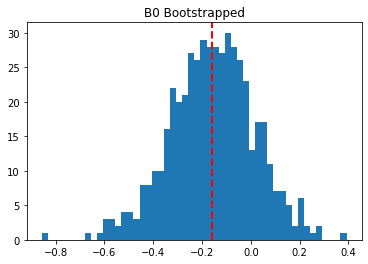

In [16]:
plt.hist(beta0, bins=50)
plt.axvline(np.mean(beta0), color='red', linestyle='dashed', linewidth=2)
plt.title('B0 Bootstrapped')

Text(0.5, 1.0, 'B1 Bootstrapped')

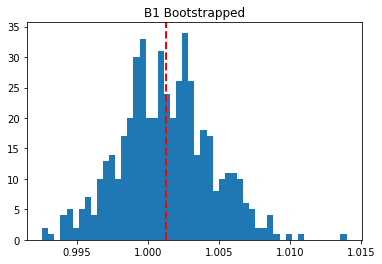

In [17]:
plt.hist(beta1, bins=50)
plt.axvline(np.mean(beta1), color='red', linestyle='dashed', linewidth=2)
plt.title('B1 Bootstrapped')

In [22]:
D = np.mean(beta1) / seb1
t_dist = t.logpdf(D, loc=0, scale=seb1, df=len(x)-2)
t_dist

-4230.20901770869

In [31]:
t.ppf(D, loc=0, scale=seb1, df=len(x)-2)

nan